# Cardio Good Fitness Project

## Objective: 

* Come up with a customer profile (characteristics of a customer) of the different products
* Perform univariate and multivariate analysis
* Generate a set of insights and recommendations that will help the company in targeting new customers


## Data:
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

* Product - The model no. of the treadmill
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

## Importing Libraries and Setting Up 

In [1]:
# Import libraries for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # used for nicer overlay in plots
# enable inline plots in jupyter
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') # supresses the warnings

In [2]:
# How to import from Google drive into Google Colab
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Changes the working directory to my Google Drive
# had to escape the blanks with \ symbols
%cd /content/drive/My\ Drive/UT\ AIML/Fundamentals\ of\ AIML/ 

/content/drive/My Drive/UT AIML/Fundamentals of AIML


In [4]:
# Read the data using pandas
cardio = pd.read_csv('CardioGoodFitness.csv')

## View the first and last 5 rows of the dataset.

In [5]:
# View the first five rows of data
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
# View the last five rows of data
cardio.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


Looking at the first few rows of data shows us we have motly numerical data, but also some categorical data as well. 

## Understanding the structure of the data

In [7]:
# Check for columns and rows
cardio.shape

(180, 9)

The dataset contains 180 rows and 9 columns.

In [8]:
# Print the column names
print(cardio.columns)

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [9]:
# View the data types and basic information
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Although the `info` function shows that every column has 180 non-null rows, we can still double-check to make sure there aren't any nulls that were missed.

In [10]:
# A trick I use often to show the percentage of null values in a column
print(cardio.isna().mean().round(4) * 100)

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64


We can now see that there are 0.0% null values in every row.

### Fixing the datatypes

* All the variables are numeric and valid with the exception of the fitness rating which is a rank from 1 to 5. This feature can be converted to a categorical datatype along with the object type features to save memory space. 

In [11]:
cat_cols = ['Product', 'Gender', 'MaritalStatus', 'Fitness']

for column in cat_cols:
    cardio[column]=cardio[column].astype('category')

In [12]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.3 KB


* The memory usage decreased from 12.8KB to 8.3KB. 

In [13]:
# Run basic stats on all the columns
cardio.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180,NaN,NaN,NaN,28.7889,6.9435,18,24,26,33,50
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180,NaN,NaN,NaN,15.5722,1.61705,12,14,16,16,21
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180,NaN,NaN,NaN,3.45556,1.0848,2,3,3,4,7
Fitness,180,5,3,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,180,NaN,NaN,NaN,53719.6,16506.7,29562,44058.8,50596.5,58668,104581
Miles,180,NaN,NaN,NaN,103.194,51.8636,21,66,94,114.75,360


* The mean of `Age` is greater than the median which indicates the feature is right skewed. 
* `Education` and `Usage` appear normally distributed since the mean and median are approximately the same. 
* `Income` and `Miles` also appear to be right skewed given the mean is greater than the median. 
* Male is the most represented in the `Gender` variable.
* The most frequent type for `MaritalStatus` is Partnered.
* Rank 3 is the most common for the `Fitness` feature. 

## Univariate Data Analysis

With univariate analysis we observe individual variables to better understand he statistical makeup of the data such as central tendency and dispersion.   

In [14]:
# Begin with visualizations by setting a color palette (this is something personal I wanted to do)
sns.color_palette("mako", as_cmap=True)

### Histogram and Boxplot Function

In [15]:
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# The boxplot and a histogram are along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot on top of a histogram for numerical data

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Age

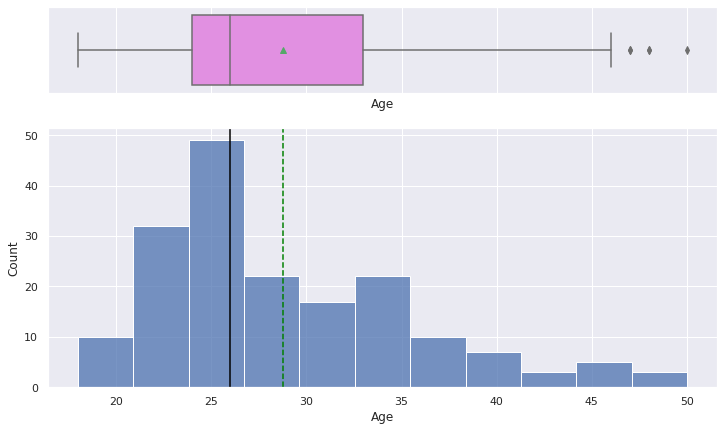

In [16]:
histogram_boxplot(cardio, "Age")

* `Age` is right skewed.
* There are some clear outliers present.
* Based on the boxplot, 75% of all the customers are 33 or younger. 

### Income

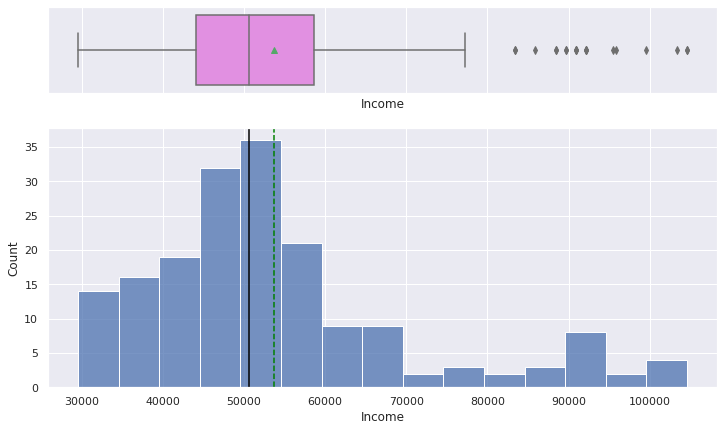

In [17]:
histogram_boxplot(cardio, "Income")

* `Income` is right skewed.
* The greatest number of customers fall between 50,000 to 60,000 dollars of annual income.
* There are several outliers to the right of the mean. 

### Education

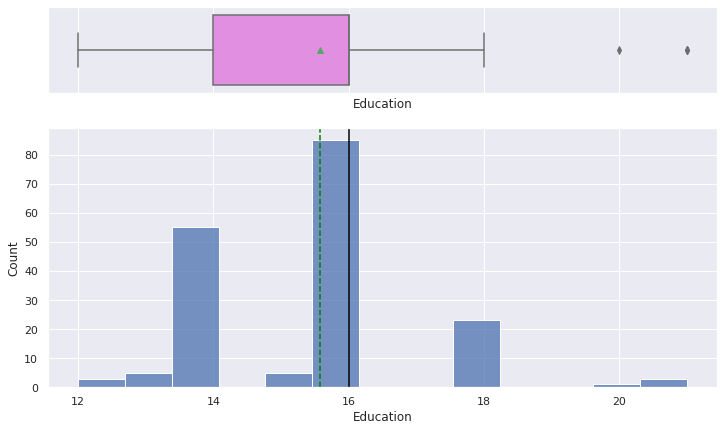

In [18]:
histogram_boxplot(cardio, "Education")

* There are a few outliers to the right of the mean.
* The mean of `Education` is ~15.5 years of education.

### Usage

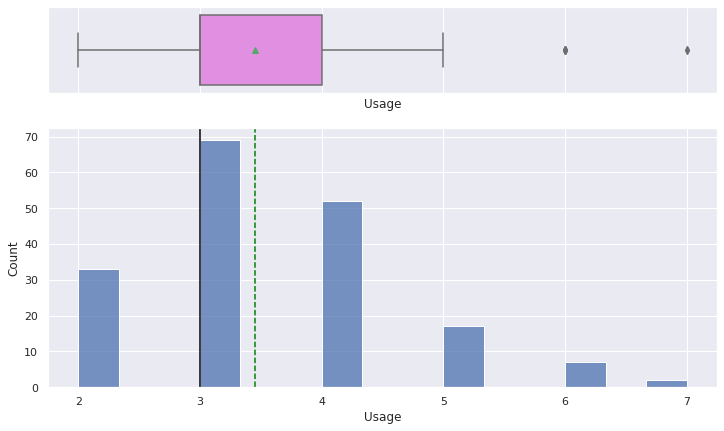

In [19]:
histogram_boxplot(cardio, "Usage")

* On average, customers use the treadmills 3-4 times a week. 
* There are a few major outliers to the right of the mean. These customers use the treadmills 6 to 7 times a week. 

### Miles

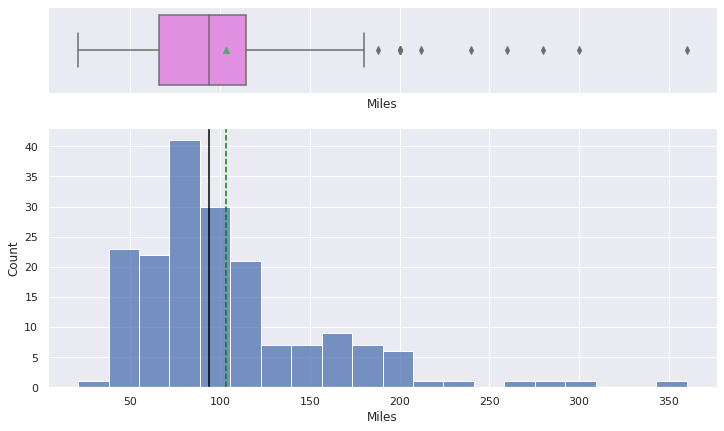

In [20]:
histogram_boxplot(cardio, "Miles")

* `Miles` is right skewed.
* Customers expect to run around 100 miles on average each week. 
* There are some extreme outliers with some customers expecting to run 300-350 miles a week. This could be either a data quality issue or professional runners.

### Labeled Barplot Function

In [21]:
# Fucntion to create labeled bar plots with percentages
# for each categorical variable


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Product

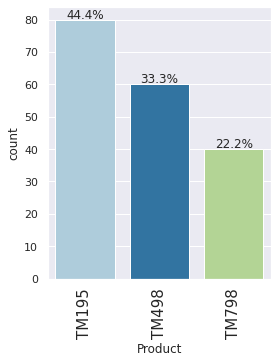

In [22]:
labeled_barplot(cardio, "Product", perc=True)

* Highest selling product is TM195 (44.%), followed by TM498 (33.3%), and TM798 (22.2%). 

### Gender

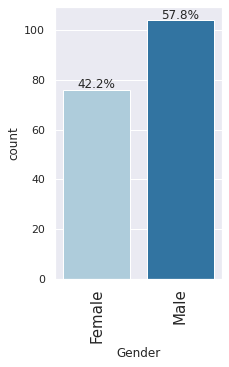

In [23]:
labeled_barplot(cardio, "Gender", perc=True)

* There are more male customers (57.8%) than female customers (42.2%). 

### MaritalStatus

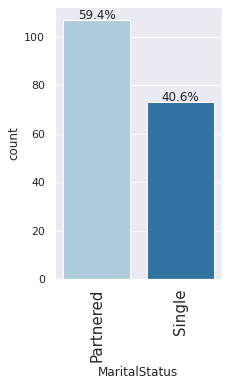

In [24]:
labeled_barplot(cardio, "MaritalStatus", perc=True)

* There are more customers who are Partnered (59.4%) than Single (40.6%). 

### Fitness

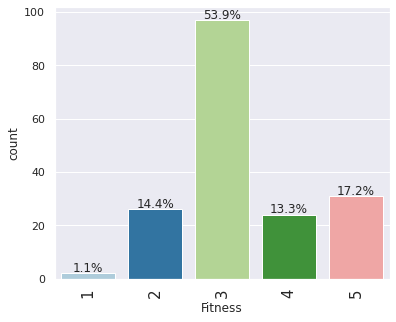

In [25]:
labeled_barplot(cardio, "Fitness", perc=True)

* Most of the customers rate themselves at a 3 (53.9%) on a scale from 1 to 5 (1 being the least fit and 5 being the most fit), and 5 as the second highest rating (17.2%). 

### Education

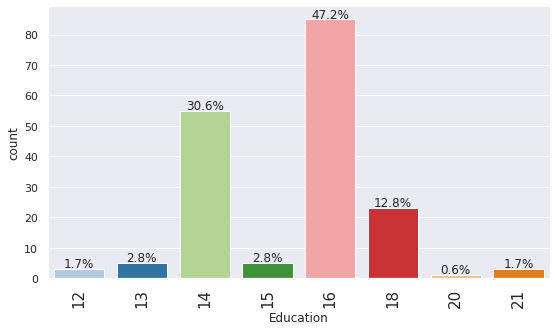

In [26]:
labeled_barplot(cardio, "Education", perc=True)

* The largest group of education years is 16 (47.2%) followed by 14 years (47.2%). 

### Usage

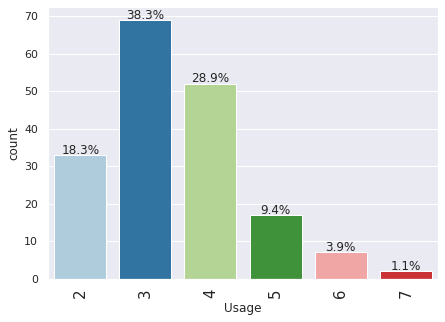

In [27]:
labeled_barplot(cardio, "Usage", perc=True)

* Customers expect to use their treadmills on average 3 times a week (38.3%) followed by 4 times a week (28.9%).

## Bivariate Data Analysis

### Correlation Statistics

A correlation matrix displays a linear relationship between two variables in the form of a numerical value wich ranges from -1 to 1, negative which indicates a negative relationship and positive indicating a positive relationship. Although corrrelation does not necessarily establish causation, we can establish important relationsips among the variables to help understand how the two interact with respect to one another.

In [28]:
# Creates a correlation matrix across all the columns
cardio_corr = cardio.corr()
cardio_corr

,Age,Education,Usage,Income,Miles
Age,1.000000,0.280496,0.015064,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.519537,0.759130
Income,0.513414,0.625827,0.519537,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.543473,1.000000


* Postive correlation indicates the two variables move in the same direction, with 1 being a perfect positive correlation which means the variables always move in the same directon. 
* Negative correlation indicates that as one variable increases, the other variables decreases. A perfect negative correlation is represented by -1 which means the two always move in opposite directions. 




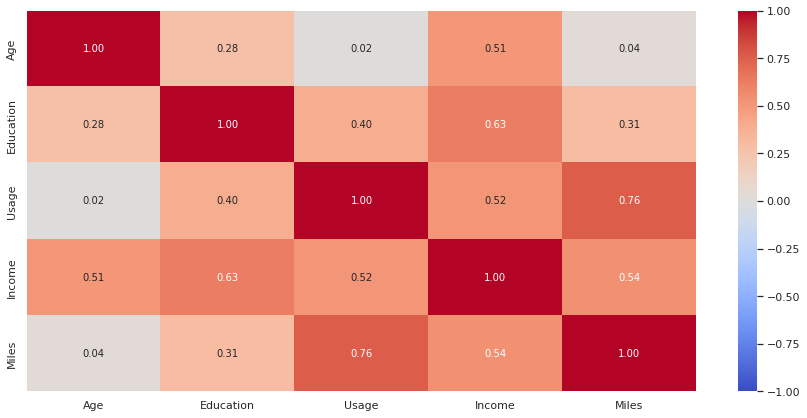

In [29]:
# Set diverging color palette to make the visual more pleasing
sns.color_palette("crest", as_cmap=True)
plt.figure(figsize=(15, 7))
sns.heatmap(cardio_corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

* Slightly high positive correlation between `Income` and `Age` which is to be expected because typically as one ages they increase their income. 
* A high positive correaltion between `Income` and `Education` and seeems typical as more education typically leads to higher wages. 
* Very high positive corealtion between `Usage` and `Miles` which makes sense as one would be using the treadmill more and thus running more miles. 
`Income` appears to have a strong positive correaltion among all the other numric variables in the dataset. 


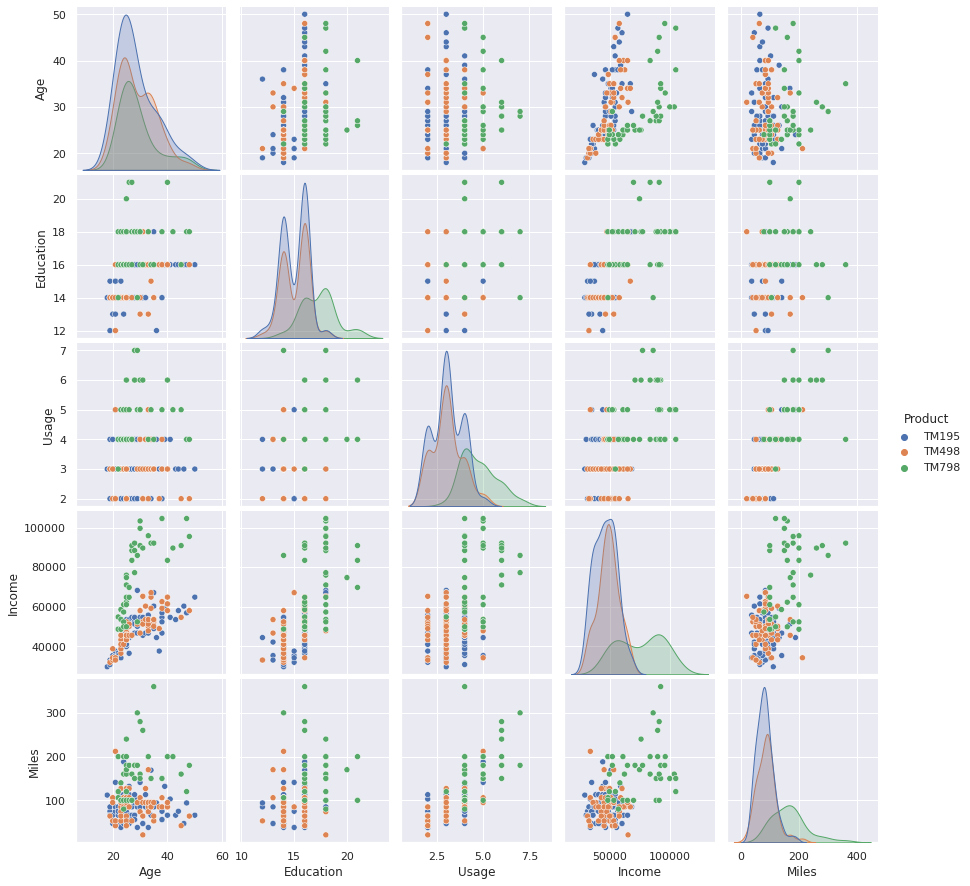

In [30]:
sns.pairplot(data=cardio.drop(["Fitness"],axis=1),hue="Product", diag_kind="kde")
plt.show()

### Product and Age

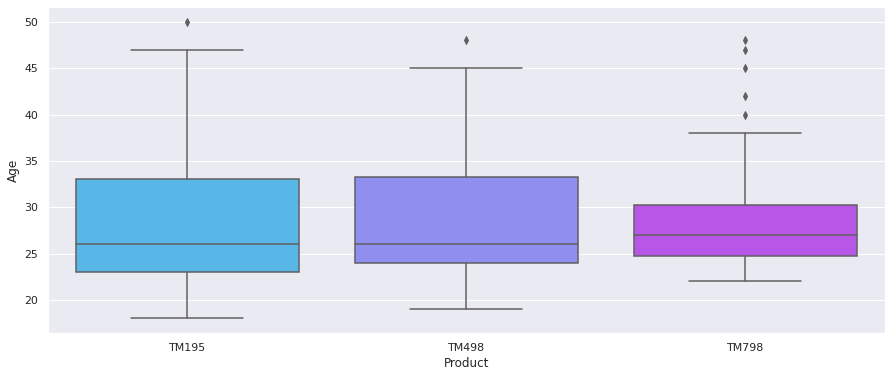

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(cardio["Product"],cardio["Age"],palette="cool")
plt.show()

* Product TM195 and TM498 have wider ranges in customer age than TM798 which has some higher aged outliers, but overall has a range between 22 and 37 years old. 

### Product and Education

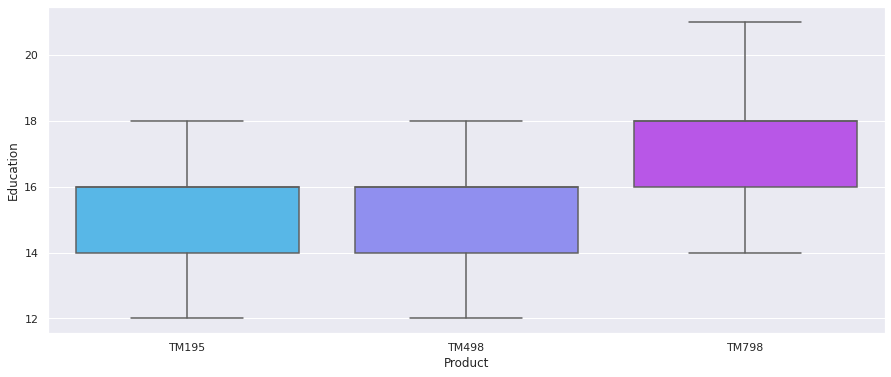

In [31]:
plt.figure(figsize=(15,6))
sns.boxplot(cardio["Product"],cardio["Education"],palette="cool")
plt.show()

* TM195 and TM498 customers have fewer years of education and mirror each other while TM798 customers have more years of education.

### Product and Usage

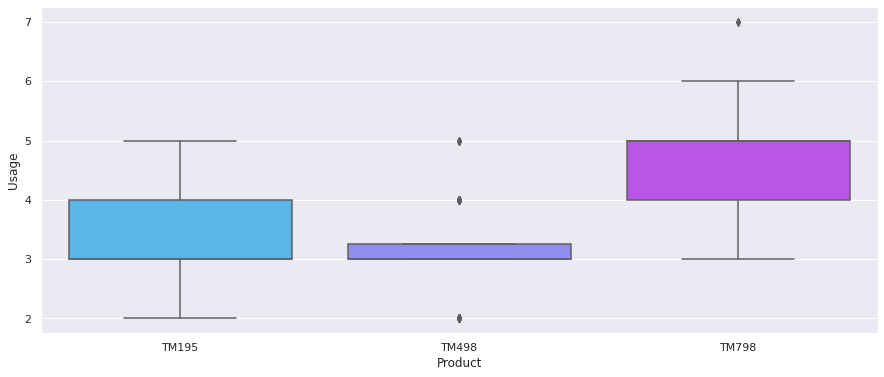

In [32]:
plt.figure(figsize=(15,6))
sns.boxplot(cardio["Product"],cardio["Usage"],palette="cool")
plt.show()

* TM195 customers have an expected usage of 2 to 5 days, TM498 customers have an expected usage of just over 3 days with some outliers, and TM798 customers have the highest epected usage from 3 to 6 days. 

### Product and Income

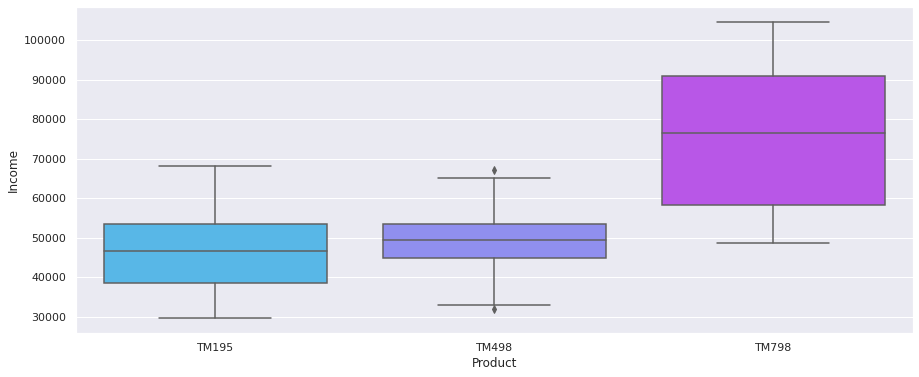

In [33]:
plt.figure(figsize=(15,6))
sns.boxplot(cardio["Product"],cardio["Income"],palette="cool")
plt.show()

* TM195 customers have the lowest annual income with the mean around 45K annually, TM498 customers have a slightly higher income with mean near 50k, and finally TM798 customer shave th highest leve of income with the mean around 75k annually. 

### Product and Miles

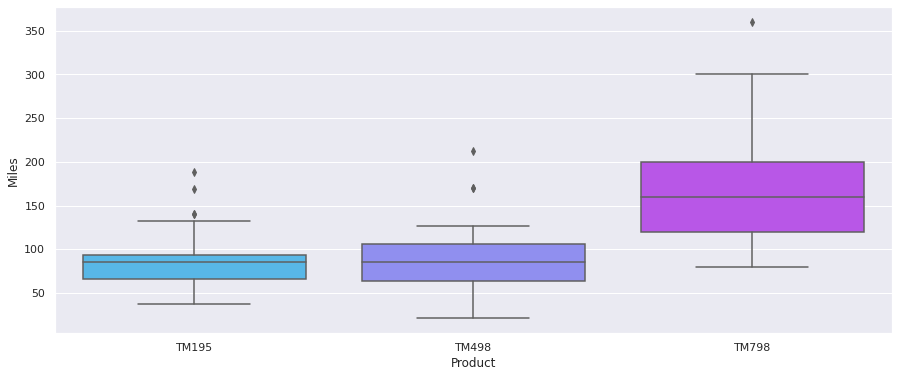

In [34]:
plt.figure(figsize=(15,6))
sns.boxplot(cardio["Product"],cardio["Miles"],palette="cool")
plt.show()

* The product again appear ranked from right to left, with TM195 customers expected to run fewer miles at around 80 miles on average a week, TM498 customer expecting to run slightly more at around 85 miles a week on average, and finally TM798 customer expecting to run 155 miles on average each week. 

### Product Gender

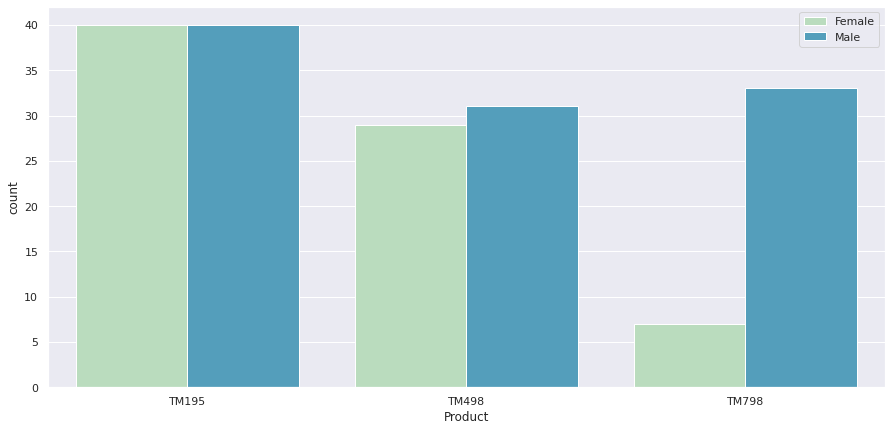

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(cardio["Product"],hue=cardio["Gender"],palette='GnBu')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The male to female ratio decreases from the TM195 to TM798 products, with TM798 have an overwhelmings majority of male customers. 

### Product and Marital Status

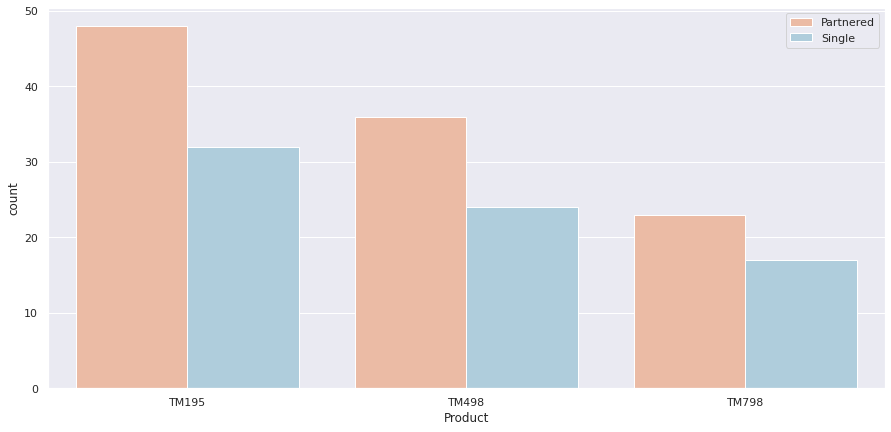

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(cardio["Product"],hue=cardio["MaritalStatus"],palette='RdBu')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Partnered customers are more represented in every product category and suggests that customers with a partner may be more likely to purchase any line of product.

### Product and Fitness

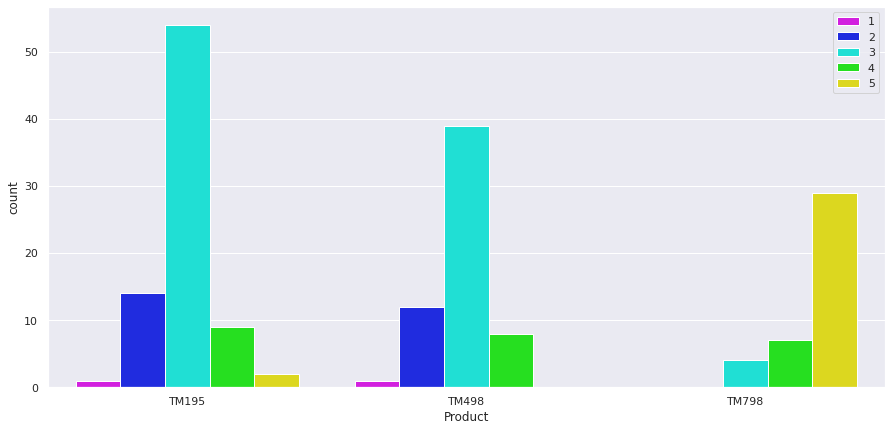

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(cardio["Product"],hue=cardio["Fitness"],palette='hsv_r')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers who purchase the TM798 model rate themselves at the higher rank of 5 more than the other two models, while both customers who purchased the TM195 and TM498 ranked themselves more as a 3. 

## Customer Segmentation

In [42]:
cardio[cardio["Product"]=="TM195"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,80,1,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,80,NaN,NaN,NaN,28.55,7.22145,18,23,26,33,50
Gender,80,2,Male,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,80,NaN,NaN,NaN,15.0375,1.21638,12,14,16,16,18
MaritalStatus,80,2,Partnered,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,80,NaN,NaN,NaN,3.0875,0.782624,2,3,3,4,5
Fitness,80,5,3,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,80,NaN,NaN,NaN,46418,9075.78,29562,38658,46617,53439,68220
Miles,80,NaN,NaN,NaN,82.7875,28.8741,38,66,85,94,188


#### TM195 Customers

* This is the most sold product in the dataset
* The average `Age` of the customer is 28
* Males and Females are equally represented
* Average years of `Education` is around 15 years
* Most customers are partnered
* Usage is ranked right in the middle at 3
* `Fitness` is at ranke at 3 most frequently
* `Income` is mostly around the range of 40k-50k

In [43]:
cardio[cardio["Product"]=="TM498"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,60,1,TM498,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,60,NaN,NaN,NaN,28.9,6.64525,19,24,26,33.25,48
Gender,60,2,Male,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,60,NaN,NaN,NaN,15.1167,1.22255,12,14,16,16,18
MaritalStatus,60,2,Partnered,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,60,NaN,NaN,NaN,3.06667,0.799717,2,3,3,3.25,5
Fitness,60,4,3,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,60,NaN,NaN,NaN,48973.7,8653.99,31836,44911.5,49459.5,53439,67083
Miles,60,NaN,NaN,NaN,87.9333,33.2631,21,64,85,106,212


#### TM498 Customers

* The second most sold product in the dataset
* `Age` averages around 29 years old
* `Gender` slightly leans more towards male
* `Education` years is like the TM195 model, averaging around 15 years
* Customers are still slightly more partnered for the TM498 model 
* `Usage` is still closer to the rank of 3 on average
* `Fitness` is mostly at the rank of 3
* `Income` is slightly higher on average than the TM195 model
* Expected miles is slightly higher than the TM195 model

In [44]:
cardio[cardio["Product"]=="TM798"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,40,1,TM798,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,40,NaN,NaN,NaN,29.1,6.97174,22,24.75,27,30.25,48
Gender,40,2,Male,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,40,NaN,NaN,NaN,17.325,1.63907,14,16,18,18,21
MaritalStatus,40,2,Partnered,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,40,NaN,NaN,NaN,4.775,0.946993,3,4,5,5,7
Fitness,40,3,5,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,40,NaN,NaN,NaN,75441.6,18505.8,48556,58204.8,76568.5,90886,104581
Miles,40,NaN,NaN,NaN,166.9,60.0665,80,120,160,200,360


#### TM798 Customers

* The TM798 model is the least sold product in the dataset
* Males represent far more of the `Gender` variable than the two other products
* `Education` is higher for the TM798 model than the other two
* `Usage` is higher for the TM798 model
* `Fitness` is higher ranked among this product
* `Income` is also higher on average and overall for the TM798 model
* Expected `Miles` are higher than the other two models

## Conclusion

### Key Insights

#### TM195: 

* The product appears to be the more affordable line of treadmill that has a fairly wide range of users.

* This line of treadmill is purcahsed more by entry-level runners who are also on the lower end of age and income. 

* These customers expect to use the treadmill less each week and run fewer miles than the higher end products. 

#### TM495: 

* This model appears to be he mid-tier product with slightly more features than the TM195 but fewer than the TM798.  

* Customer of this slightly upgraded product have similar age demographic as the TM195 model but with a sligthly higher income.  

* Customers of this model expect to use the treadmill the same amount as the TM195 customers, but expect to run slightly more miles each week. 


#### TM798: 

* This treadmill appears to be the top of the line product with more features than the previous too.  

* The customers of this product rank themselves higher in fitness and expect to run more often throughout the week and log more miles each week. 

* The customer income and education is higher for this product which reninforces the notion that it is likely the most expensive model. 

* Male customers prefer this treadmill far more than female customers.

### Business Recommendations 

#### TM195:

* The company can market its most affordable product, the TM195, to a varied demogaphic of customers. Since it is likely more affordable, it will require more sales and the strategy of selling to as broad a demographic of customers is paramount. 

* This model is preferred by those with a lower level of fitness and expecting to run less often and fewer miles each. Given this information, this product to be marketed to more novice runners and those looking to start running or beginning to exercise. 

#### TM498: 

* Since this treadmill is likely the mid-tier product, the strategy for this model will need to be unique given the circumstances. The main differences between these customers and the TM195 customers is that they exercise slightly more and have a slightly higher income.

* Given the information avaialble from the data, the best strategy to market this product would be as an upgrade to existing customers who have already established an exercise routine. Since the TM498 model likely has some upgraded features from the TM195 mocel, apresenting these better features to TM195 customers may excite them to upgrade their treadmill. 

#### TM798: 

* This is likely the most expensive model of treadmill and more features so it should be marketed to higher income individuals who also have more years of education. Given the added features and the customers' expectations for running more and their fitness level, the more experienced runners should be targeted with this model. 
